# Prepocessing  the Data: including scaling, dimensinality reduction

In [1]:
import numpy as np 
import pandas as pd


In [40]:
df3=pd.read.csv(r'C:\Users\zhaoshuting\Documents\研究生\Module 3\Machine Learning in Finance\Fake Job\3.data preprocessing\final data.csv',engine ='python')
X0=df3.values
X,y=X0[:,:-1],X0[:,-1]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [41]:
df.fraudulent.sum()/df.fraudulent.count()

0.04908324792164902

# Apply LR / SVM / Decision Tree below

Apply LR

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer


scorer = make_scorer(precision_score, pos_label=0)

pipe_lr = make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='liblinear'))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = [{'logisticregression__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.950947825914386
{'logisticregression__C': 0.001}


[[5010    0]
 [ 259    0]]


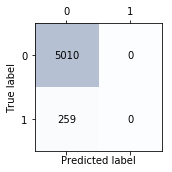

Precision: 0.951
Recall: 1.000
F1: 0.975


In [43]:
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

Apply SVM

In [44]:
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.1,1.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  refit=True,
                  cv=3,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9509476931602395
{'svc__C': 0.1, 'svc__kernel': 'linear'}


[[5010    0]
 [ 259    0]]


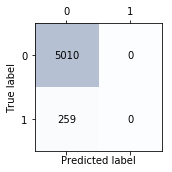

Precision: 0.951
Recall: 1.000
F1: 0.975


In [45]:
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

Apply Descision tree 

In [46]:
from sklearn.tree import DecisionTreeClassifier
pipe_tree = make_pipeline(StandardScaler(),
                         DecisionTreeClassifier(criterion='gini'))

param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

param_grid = [{'decisiontreeclassifier__max_depth': param_range}]

gs = GridSearchCV(estimator=pipe_tree, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9571323888335233
{'decisiontreeclassifier__max_depth': 13}


In [47]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin' 
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=15, 
                              random_state=1)
tree.fit(X_train, y_train)

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['NoFraudulent', 'Fraudulent',],
                           feature_names=['required_education', 'salary_range_min', 'employment_type_Other',
                                          'employment_type_Part-time', 'employment_type_Temporary',
                                          'employment_type_Unknown'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

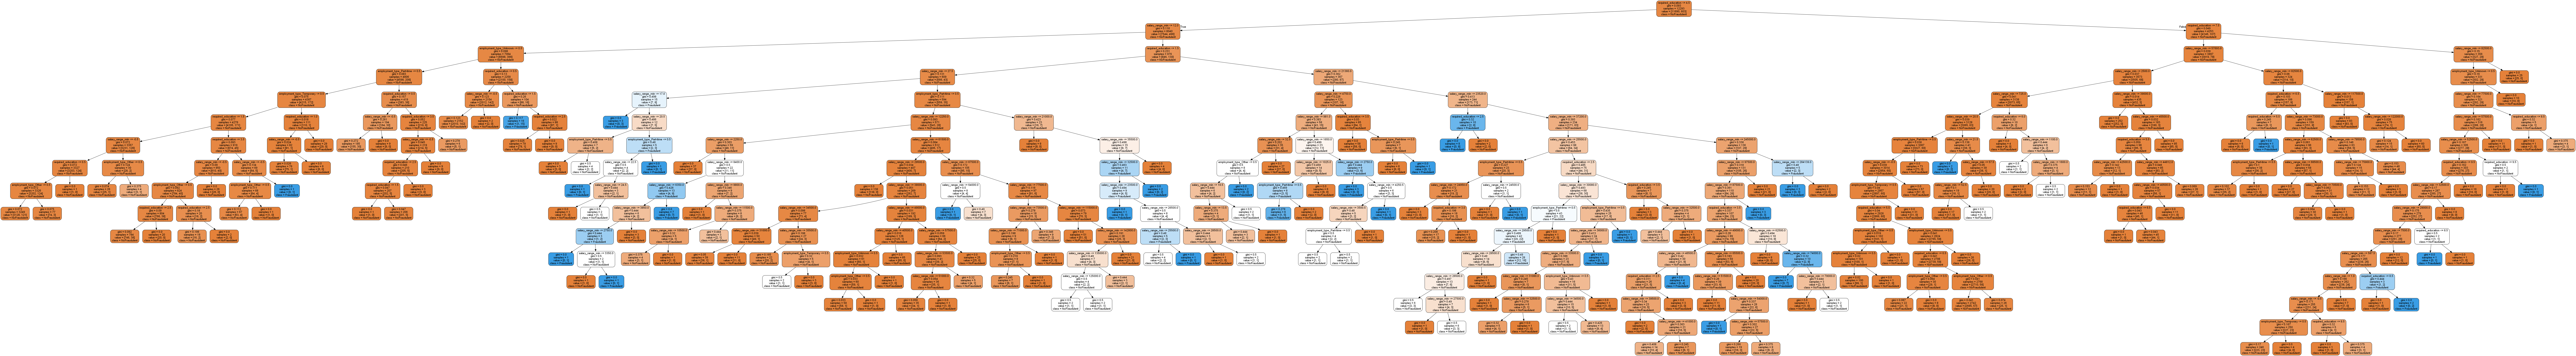

In [48]:
from IPython.display import Image
%matplotlib inline
Image(filename='tree.png', width=600) 

[[4994   16]
 [ 222   37]]


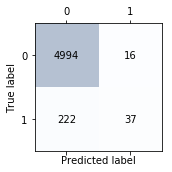

Precision: 0.957
Recall: 0.997
F1: 0.977


In [49]:
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

# Apply PCA to test LR/SVM/TREE

Extract 2 features using PCA method

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pca = PCA()

stdsc = StandardScaler()
X0=df2.values
X,y=X0[:,:-1],X0[:,-1]



X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.43453937e-01, 1.24968051e-01, 9.53831448e-02, 7.05592666e-02,
       6.86714796e-02, 6.43007188e-02, 6.21230830e-02, 6.15915002e-02,
       5.81931195e-02, 5.52935709e-02, 5.16119300e-02, 4.89260351e-02,
       3.81767698e-02, 2.99942979e-02, 2.67409699e-02, 1.21259555e-05])

In [51]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

Test LR based on pca

In [52]:
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),
                         LogisticRegression(penalty='l1',solver='liblinear'))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = [{'logisticregression__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8923972744129764
{'logisticregression__C': 1.0}


[[3953  298]
 [ 438  580]]


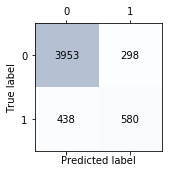

Precision: 0.900
Recall: 0.930
F1: 0.915


In [53]:
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

Test SVM based on pca

In [54]:
pipe_svc = make_pipeline(StandardScaler(),PCA(n_components=2),
                         SVC(random_state=1))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']}]
              #{'svc__C': param_range, 
              # 'svc__gamma': param_range, 
              # 'svc__kernel': ['rbf']}] Due to computational capability constraint we cannot run through rbf code here

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9271390427342354
{'svc__C': 10.0, 'svc__kernel': 'linear'}


[[3977  274]
 [ 491  527]]


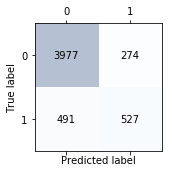

Precision: 0.890
Recall: 0.936
F1: 0.912


In [55]:
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

Test Tree based on pca

In [56]:
pipe_tree = make_pipeline(StandardScaler(),PCA(n_components=2),
                         DecisionTreeClassifier(criterion='gini'))

param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

param_grid = [{'decisiontreeclassifier__max_depth': param_range}]

gs = GridSearchCV(estimator=pipe_tree, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9686746038149752
{'decisiontreeclassifier__max_depth': 6}


[[3809  442]
 [ 148  870]]


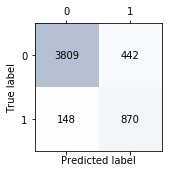

Precision: 0.963
Recall: 0.896
F1: 0.928


In [57]:
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()


print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))


We can see that the last method: PCA + Tree provides the best PRE rate.  
Let's draw the ROC curve of it.

In [58]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

pipe_tree = make_pipeline(StandardScaler(),PCA(n_components=2),
                         DecisionTreeClassifier(criterion='gini',max_depth=8))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

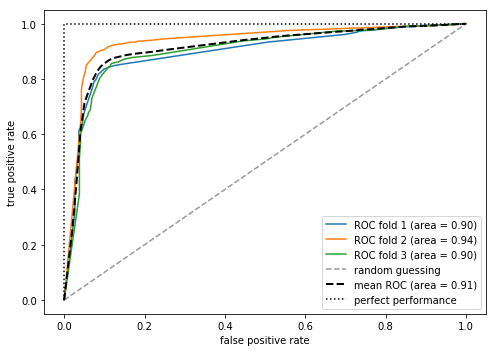

In [59]:
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_tree.fit(X_train_pca[train],
                        y_train[train]).predict_proba(X_train_pca[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                    probas[:, 0],
                                    pos_label=0)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
            tpr,
            label='ROC fold %d (area = %0.2f)'
                  % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

# RandomForest, Bagging and Adaboost

## For non-PCA data

[[4201   50]
 [  40  978]]


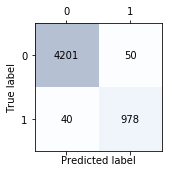

Precision: 0.991
Recall: 0.988
F1: 0.989


In [60]:
def RandomForest_func(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    from sklearn.ensemble import RandomForestClassifier

    forest = RandomForestClassifier(criterion='gini',
                                    n_estimators=25, 
                                    random_state=1,
                                    n_jobs=2)
    forest.fit(X_train, y_train)

    from sklearn.metrics import confusion_matrix

    y_pred = forest.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    #plt.savefig('images/06_09.png', dpi=300)
    plt.show()


    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

RandomForest_func()

[[4197   54]
 [  30  988]]


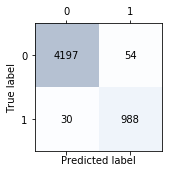

Precision: 0.993
Recall: 0.987
F1: 0.990


In [61]:
def Bagging_func(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    from sklearn.ensemble import BaggingClassifier
    from sklearn.tree import DecisionTreeClassifier

    tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=None,
                                  random_state=1)

    bag = BaggingClassifier(base_estimator=tree,
                            n_estimators=500, 
                            max_samples=1.0, 
                            max_features=1.0, 
                            bootstrap=True, 
                            bootstrap_features=False, 
                            n_jobs=1, 
                            random_state=1)

    bag = bag.fit(X_train, y_train)
    y_train_pred = bag.predict(X_train)
    y_test_pred = bag.predict(X_test)

    from sklearn.metrics import confusion_matrix

    y_pred = bag.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    #plt.savefig('images/06_09.png', dpi=300)
    plt.show()


    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    
Bagging_func()

[[4150  101]
 [  24  994]]


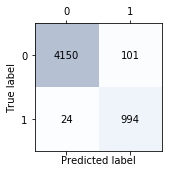

Precision: 0.994
Recall: 0.976
F1: 0.985


In [62]:
def AdaBoost_func(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    from sklearn.ensemble import AdaBoostClassifier

    tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=1,
                                  random_state=1)

    ada = AdaBoostClassifier(base_estimator=tree,
                             n_estimators=500, 
                             learning_rate=0.1,
                             random_state=1)

    ada = ada.fit(X_train, y_train)
    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)

    from sklearn.metrics import confusion_matrix

    y_pred = ada.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    #plt.savefig('images/06_09.png', dpi=300)
    plt.show()


    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    
AdaBoost_func()

## For PCA data

[[4001  250]
 [ 244  774]]


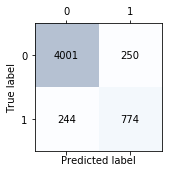

Precision: 0.943
Recall: 0.941
F1: 0.942


In [63]:
RandomForest_func(X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

[[4008  243]
 [ 228  790]]


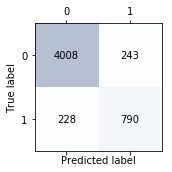

Precision: 0.946
Recall: 0.943
F1: 0.945


In [64]:
Bagging_func(X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

[[4083  168]
 [ 733  285]]


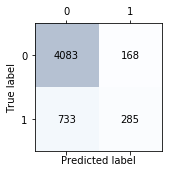

Precision: 0.848
Recall: 0.960
F1: 0.901


In [65]:
AdaBoost_func(X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

For these 3 complex algorithms, using the original data provides a better score than PCA.

# Dealing with data imbalance by upsampling

In [66]:
X0=df2.values
X,y=X0[:,:-1],X0[:,-1]

In [67]:
X_imb = np.vstack((X[y == 0], X[y == 1]))
y_imb = np.hstack((y[y == 0], y[y == 1]))
y_imb

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [68]:
from sklearn.utils import resample

print('Number of class 1 samples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('Number of class 1 samples after:', X_upsampled.shape[0])

Number of class 1 samples before: 3392
Number of class 1 samples after: 14170


In [69]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [70]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

## Continue running models

In this part I didn't use def to function the above code, 'cause I think it will reduce to readability.   
The following code may mainly repeat the code above, the reader could skip it and just look for the output result.

In [71]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =\
    train_test_split(X_bal, y_bal, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y_bal)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [72]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

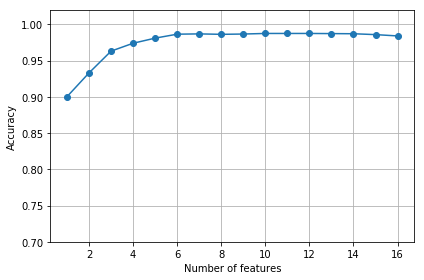

In [73]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

Again let's pick 6 X features.

In [74]:
k6 = list(sbs.subsets_[10])
print(df2.columns[1:][k6])

Index(['description', 'required_education', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'employment_type_Unknown'],
      dtype='object')


In [75]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k6], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k6], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k6], y_test))

Training accuracy: 0.9888093557818328
Test accuracy: 0.9829451893672078
Training accuracy: 0.9870450650267164
Test accuracy: 0.983298047518231


Now we get the same selected 6 features here.   
Even the order between the first and second feature switches now, it doesn't make real difference in the following process.

In [76]:
X_bal

array([[ 885,  905,  852, ...,    1,    0,    0],
       [1286, 2077, 1433, ...,    0,    0,    0],
       [ 614, 2600, 1429, ...,    0,    0,    0],
       ...,
       [ 838,  246,    1, ...,    0,    0,    0],
       [   1, 1844,  913, ...,    0,    0,    0],
       [   1,  852,  256, ...,    0,    0,    0]], dtype=int64)

In [77]:
#df3=df2[['required_education', 'salary_range_min', 'employment_type_Other',
#       'employment_type_Part-time', 'employment_type_Temporary',
#       'employment_type_Unknown','fraudulent']]
df3=df2[['description', 'required_education', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'employment_type_Unknown','fraudulent']]
X0=df3.values
X,y=X0[:,:-1],X0[:,-1]
X_imb = np.vstack((X[y == 0], X[y == 1]))
y_imb = np.hstack((y[y == 0], y[y == 1]))
from sklearn.utils import resample

print('Number of class 1 samples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
print(np.mean(y_pred == y_bal) * 100)



Number of class 1 samples before: 862
50.0


In [78]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =\
    train_test_split(X_bal, y_bal, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y_bal)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


0.6604682733379353
{'logisticregression__C': 0.001}
[[1737 3273]
 [1032 3978]]


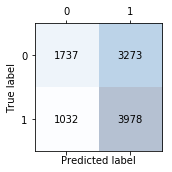

Precision: 0.627
Recall: 0.347
F1: 0.447


In [79]:
#LR
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer


scorer = make_scorer(precision_score, pos_label=0)

pipe_lr = make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='liblinear'))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = [{'logisticregression__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

0.6605199194060126
{'svc__C': 0.1, 'svc__kernel': 'linear'}
[[1781 3229]
 [1042 3968]]


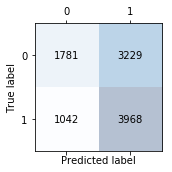

Precision: 0.631
Recall: 0.355
F1: 0.455


In [80]:
#SVM
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.1,1.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  refit=True,
                  cv=3,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

0.8963642185053544
{'decisiontreeclassifier__max_depth': 15}
[[4310  700]
 [ 523 4487]]


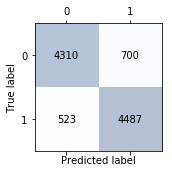

Precision: 0.892
Recall: 0.860
F1: 0.876


In [81]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
pipe_tree = make_pipeline(StandardScaler(),
                         DecisionTreeClassifier(criterion='gini'))

param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

param_grid = [{'decisiontreeclassifier__max_depth': param_range}]

gs = GridSearchCV(estimator=pipe_tree, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

In [88]:
#PCA-LR
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

stdsc = StandardScaler()
#X0=df2.values
#X,y=X0[:,:-1],X0[:,-1]



X_train, X_test, y_train, y_test =\
    train_test_split(X_bal, y_bal, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y_bal)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [95]:
pca = PCA(n_components=2)



0.5687791610232331
{'logisticregression__C': 1.0}
[[2675 2335]
 [2119 2891]]


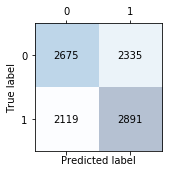

Precision: 0.558
Recall: 0.534
F1: 0.546


In [96]:
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),
                         LogisticRegression(penalty='l1',solver='liblinear'))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = [{'logisticregression__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

0.5662362379281027
{'svc__C': 0.001, 'svc__kernel': 'linear'}
[[2739 2271]
 [2213 2797]]


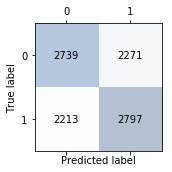

Precision: 0.553
Recall: 0.547
F1: 0.550


In [97]:
#PCA-SVM
pipe_svc = make_pipeline(StandardScaler(),PCA(n_components=2),
                         SVC(random_state=1))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']}]
              #{'svc__C': param_range, 
              # 'svc__gamma': param_range, 
              # 'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

0.8891286239705064
{'decisiontreeclassifier__max_depth': 15}
[[4143  867]
 [ 392 4618]]


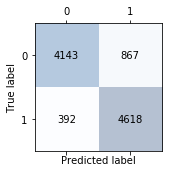

Precision: 0.914
Recall: 0.827
F1: 0.868


In [98]:
#PCA-Tree
pipe_tree = make_pipeline(StandardScaler(),PCA(n_components=2),
                         DecisionTreeClassifier(criterion='gini'))

param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

param_grid = [{'decisiontreeclassifier__max_depth': param_range}]

gs = GridSearchCV(estimator=pipe_tree, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()


print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))


In [99]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

[[4201   50]
 [  40  978]]


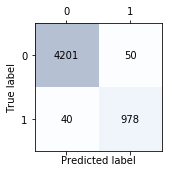

Precision: 0.991
Recall: 0.988
F1: 0.989
[[4642  368]
 [   0 5010]]


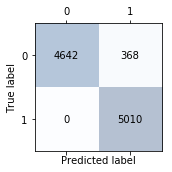

Precision: 1.000
Recall: 0.927
F1: 0.962


In [100]:
# RandomForest, Bagging, AdaBoost
RandomForest_func()
RandomForest_func(X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

[[4197   54]
 [  30  988]]


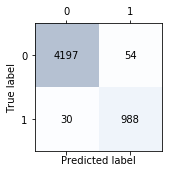

Precision: 0.993
Recall: 0.987
F1: 0.990
[[4644  366]
 [   0 5010]]


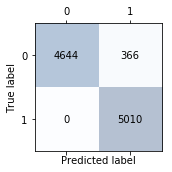

Precision: 1.000
Recall: 0.927
F1: 0.962


In [101]:
Bagging_func()
Bagging_func(X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

[[4150  101]
 [  24  994]]


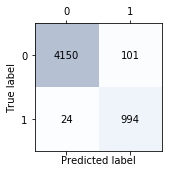

Precision: 0.994
Recall: 0.976
F1: 0.985
[[3074 1936]
 [1465 3545]]


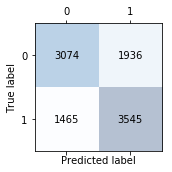

Precision: 0.677
Recall: 0.614
F1: 0.644


In [102]:
AdaBoost_func()
AdaBoost_func(X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)